In [1]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [2]:
df_term_deposit = pd.read_csv("E:\project 8 svm/bank-additional-full.csv",delimiter=';')


In [3]:
df_term_deposit.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df_term_deposit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# 3. Understand and Prepare the Data
# Image 	
# The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis.

# Here we will analyze and prepare data to perform regression techniques:
# 1. Check dimensions and data types of the dataframe
# 2. Study summary statistics
# 3. Check for missing values
# 4. Study correlation

In [6]:
df_term_deposit.shape

(41188, 21)

In [7]:
df_term_deposit.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [8]:
#We see that the data is imbalanced

In [9]:
# 3.2 Statistical Summary

# Here we take a look at the summary of each attribute. 
# This includes the count, mean, the min and max values as well as some percentiles for numeric variables.


In [10]:
# In our dataset we have numerical variables. Now we check for summary statistics of all the variables
# For numerical variables, we use .describe(). For categorical variables we use describe(include='object').

In [11]:
# data frame with numerical features
df_term_deposit.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
# data frame with categorical features
df_term_deposit.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [13]:
# The above output illustrates the summary statistics of all the categorical variables like unique(no.of levels in the variable), top(majority level) and the count of the majority level. 

In [14]:
# 3.3. Label Encoding for Target Variable

# Converting target categorical variable into numeric

In [15]:
# label_encoder = preprocessing.LabelEncoder()
# df_term_deposit['y']= label_encoder.fit_transform(df_term_deposit['y'])
# df_term_deposit.head()
# as it returs array

In [16]:

# replace 'no' with zero
df_term_deposit['y'] = df_term_deposit['y'].replace('no', 0)
# replace 'yes' with one
df_term_deposit['y'] = df_term_deposit['y'].replace('yes', 1)

df_term_deposit.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [17]:
df_cat = df_term_deposit.select_dtypes(include='object')
df_num = df_term_deposit.select_dtypes(exclude='object')        


In [18]:
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [19]:
df_num.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [20]:
# Convert categorical variables into dummy variables.
#drop_first = TRUE for n-1 dummy coding
data_cat_dummies  = pd.get_dummies(df_cat,drop_first=True)

In [21]:
data_cat_dummies.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [22]:
# merger the two datafraes for further analysis
df_term_deposit = pd.concat([df_num, data_cat_dummies], axis=1)

In [23]:
df_term_deposit.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


In [24]:
# check correlation
df_num = df_num.drop('y', axis=1)
corr = df_num.corr()
corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


Text(0.5, 1.0, 'Correlation between features')

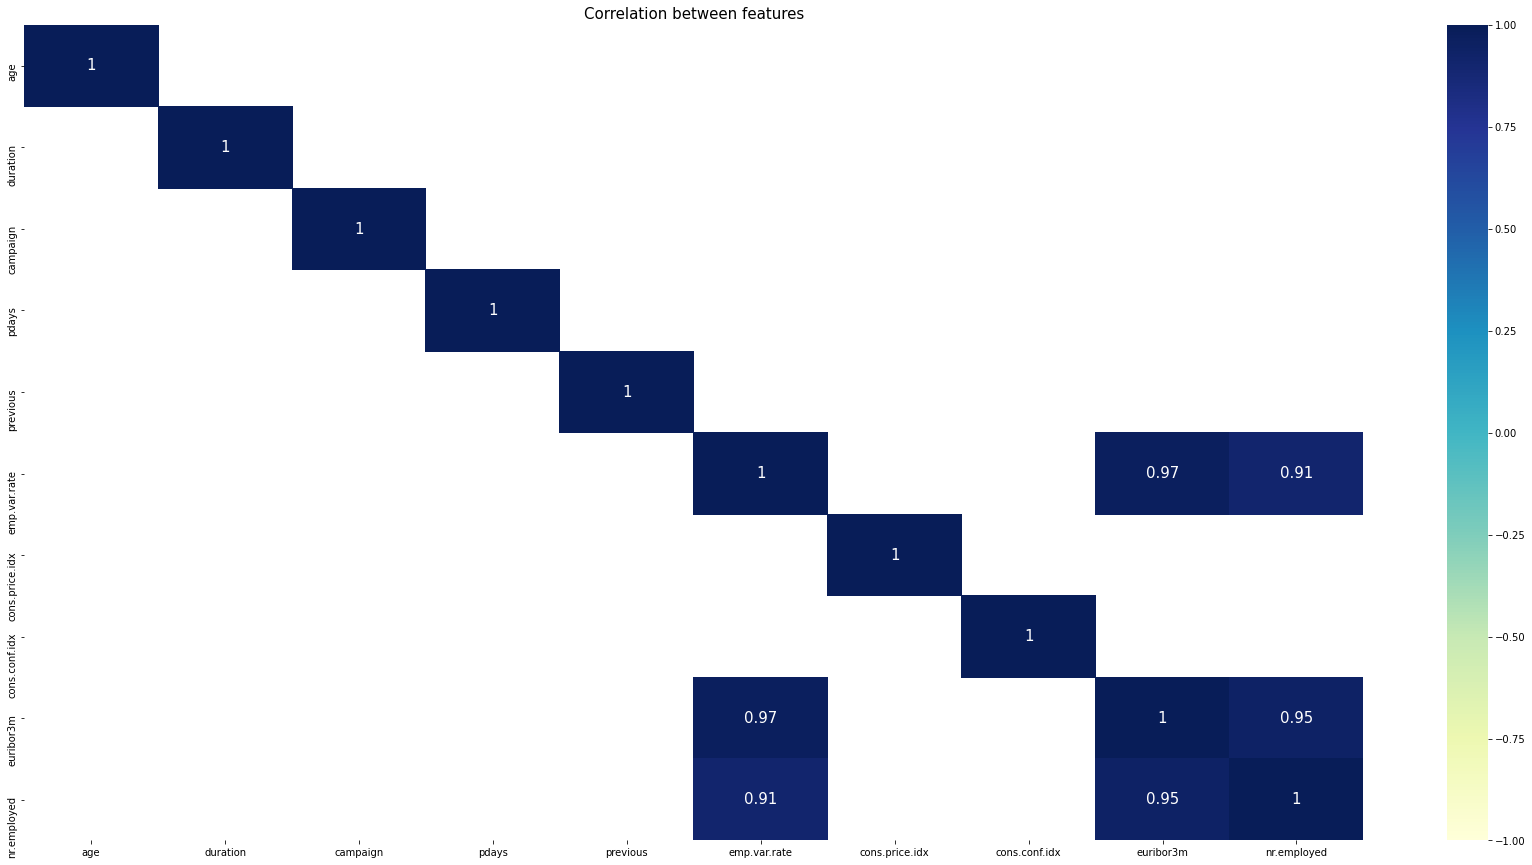

In [25]:
# ploting correlation plot

# set the figure size
plt.figure(figsize=(30, 15))

# plotting the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# set condition to get a strong correlation between the variables
sns.heatmap(corr[(corr >= 0.9) | (corr <= -0.9)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0,
            annot=True, annot_kws={"size": 15})

# set the title
# fontsize=30: set the font size of the title
plt.title('Correlation between features', fontsize=15)
# display the plotplt.show()

In [26]:
# By looking at the correlation matrix we can see that variables euribor3m, emp.var.rate and nr.employed have a strong positive correlation with each other. 
# These feature pairs are strongly correlated to each other. 
# Ideally, we should not select these features together for training the model. 
# However, we will go ahead using all variables.

In [27]:
# 4.1 Support Vector Machine using Linear Kernal

# Now we build a SVM model using linear kernal. We start with our original data set gradually proceeding with our analysis

# In order to buil a SVM model using linear kernal, we do the following:
# 1. Split the dataset set
# 2. Build the model
# 3. Predict the values
# 4. Compute the accuracy measures
# 5. Tabulate the results 

In [28]:
df_term_deposit.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


In [29]:
# extract the predictor variables
X = df_term_deposit.iloc[:, df_term_deposit.columns != 'y']
# extract the target variable
y = df_term_deposit.iloc[:, df_term_deposit.columns == 'y']

In [30]:
# let us now split the dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("y_train ",y_train.shape)

# print the shape of 'y_test'
print("y_test ",y_test.shape)

X_train  (28831, 53)
X_test  (12357, 53)
y_train  (28831, 1)
y_test  (12357, 1)


In [31]:
y.shape

(41188, 1)

In [32]:
# build the model
svclassifier = SVC(kernel = 'linear') #No kernel trick = no feature extraction

# fit the model
svclassifier.fit(X_train, y_train) #TRaining, getting optimal weights


C:\Users\ABC\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [33]:
# predict the values
y_pred = svclassifier.predict(X_test)

In [34]:
y_pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [35]:
y_test[0:5] #ground truth

,y
29773,0
14070,0
39364,1
29279,0
11888,0


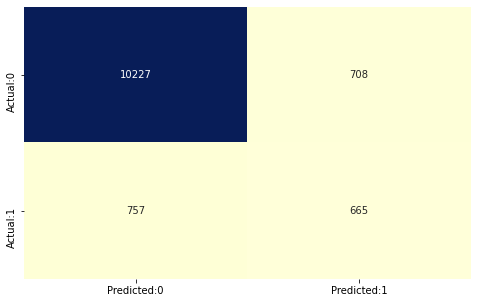

In [36]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [37]:
   # True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]      

In [38]:
# accuracy measures by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     10935
           1       0.48      0.47      0.48      1422

    accuracy                           0.88     12357
   macro avg       0.71      0.70      0.70     12357
weighted avg       0.88      0.88      0.88     12357



In [39]:
# compute kappa value
kappa = metrics.cohen_kappa_score(y_test, y_pred)

# print kappa
print('kappa value:',kappa)

kappa value: 0.409035901573215


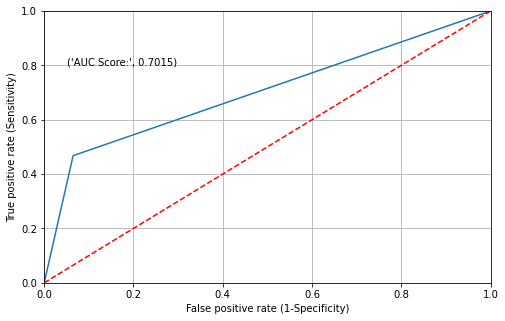

In [40]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)
#The ROC is not zig-zag and just straight because SVC doesn't provide any probability info

In [41]:
# The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)

# We see our classifier is fairly away from the dotted line; which means the SVM with linear kernel classifier is a fairly good classifier 

In [42]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names
cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score','f1-score']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
SVM_linear_metrics = pd.Series({'Model': "SVM using linear kernel ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                  'f1-score':metrics.f1_score(y_test, y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(SVM_linear_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM using linear kernel,0.701452,0.484341,0.467651,0.881444,0.409036,0.47585


In [43]:
# 4.2 Support Vector Machine using Gaussian Kernal
# Now we build a SVM model using Gaussian kernal. We start with our original data set gradually proceeding with our analysis

# In order to buil a SVM model using Gaussian kernal, we do the following:
# 1. Build the model
# 2. Predict the values
# 3. Compute the accuracy measures
# 4. Tabulate the results 

In [44]:
# build the model
svclassifier = SVC(kernel='rbf') #Extracts new features with gaussian kernel trick
# fit the model
svclassifier.fit(X_train, y_train)

C:\Users\ABC\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [45]:
# predict the values
y_pred_gaussian  = svclassifier.predict(X_test)

In [46]:
y_pred_gaussian[0:5]

array([0, 0, 1, 0, 0], dtype=int64)

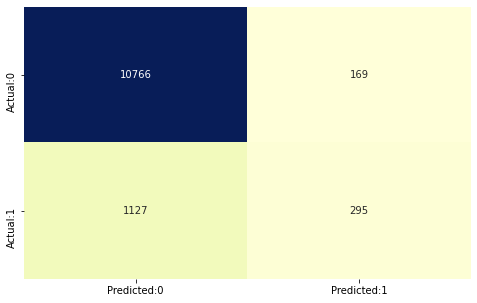

In [47]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_gaussian)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [48]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]   

In [49]:
# accuracy measures by classification_report()
result = classification_report(y_test, y_pred_gaussian)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10935
           1       0.64      0.21      0.31      1422

    accuracy                           0.90     12357
   macro avg       0.77      0.60      0.63     12357
weighted avg       0.87      0.90      0.87     12357



In [50]:
# compute kappa value
kappa = metrics.cohen_kappa_score(y_test, y_pred_gaussian)

# print kappa
print('kappa value:',kappa)

kappa value: 0.27158643128078885


In [51]:
# kappa value: 0.27158643128078885

# Cohen’s kappa statistic measures interrater reliability (sometimes called interobserver agreement). Interrater reliability, or precision, happens when your data raters (or collectors) give the same score to the same data item. The kappa score can range between 0 -1, where.


# 0 = agreement equivalent to chance.
# 0.1 – 0.20 = slight agreement.
# 0.21 – 0.40 = fair agreement.
# 0.41 – 0.60 = moderate agreement.
# 0.61 – 0.80 = substantial agreement.
# 0.81 – 0.99 = near perfect agreement
# 1 = perfect agreement.

# Therefore from the above result we can say that there is a fair interobserver agreement


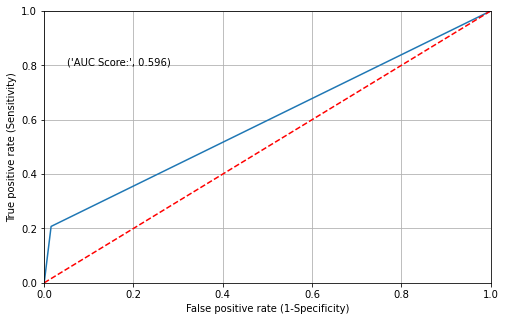

In [52]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_gaussian)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_gaussian),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [53]:
# The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)

# We see our classifier (SVM using linear gaussian) is not very far away from the dotted line; which means the SVM using gaussian classifier is not a very good classifier 

In [54]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names


# compiling the required information
SVM_Gaussian_metrics = pd.Series({'Model': "SVM using gaussian kernal ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_gaussian),
                 'Precision Score': metrics.precision_score(y_test, y_pred_gaussian),
                 'Recall Score': metrics.recall_score(y_test, y_pred_gaussian),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_gaussian),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_gaussian),
                  'f1-score':metrics.f1_score(y_test, y_pred_gaussian)})



# appending our result table
result_tabulation = result_tabulation.append(SVM_Gaussian_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM using linear kernel,0.701452,0.484341,0.467651,0.881444,0.409036,0.475850
1,SVM using gaussian kernal,0.596000,0.635776,0.207454,0.895120,0.271586,0.312831


In [55]:
# It can be seen from the result tabulation, that all of the accuracy measures for both the models are not very good. 
# However, for term deposit subscription prediction, type 2 errors are costly. The type 2 error for both the above models are high. 
# Hence, this may not be the best model for the required prediction. 

In [56]:
# 4.3 Support Vector Machine using Sigmoid Kernal
# Now we build a SVM model using Sigmoid kernal. We start with our original data set gradually proceeding with our analysis

# In order to buil a SVM model using Sigmoid kernal, we do the following:
# 1. Build the model
# 2. Predict the values
# 3. Compute the accuracy measures
# 4. Tabulate the results 

In [57]:
# build the model
svclassifier = SVC(kernel='sigmoid')
# fit the model
svclassifier.fit(X_train, y_train)

C:\Users\ABC\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='sigmoid')

In [58]:
# predict the values
y_pred_sigmoid  = svclassifier.predict(X_test)

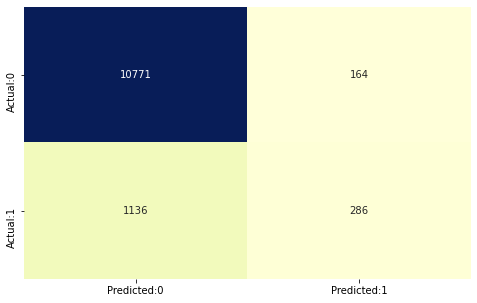

In [59]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_sigmoid)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [60]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]      

In [61]:
# accuracy measures by classification_report()
result = classification_report(y_test,y_pred_sigmoid)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10935
           1       0.64      0.20      0.31      1422

    accuracy                           0.89     12357
   macro avg       0.77      0.59      0.62     12357
weighted avg       0.87      0.89      0.87     12357



In [62]:
# compute kappa value
kappa = metrics.cohen_kappa_score(y_test, y_pred_sigmoid)

# print kappa
print('kappa value:',kappa)

kappa value: 0.26488515915613153


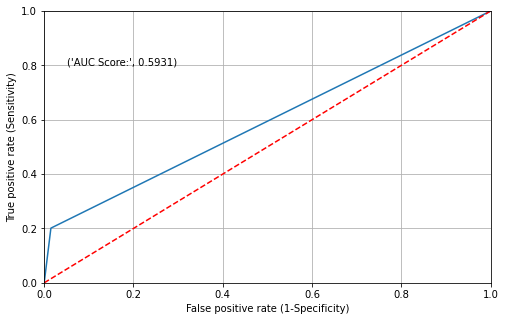

In [63]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_sigmoid)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_sigmoid),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [64]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names


# compiling the required information
SVM_sigmoid_metrics = pd.Series({'Model': "SVM using sigmoid kernal ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_sigmoid),
                 'Precision Score': metrics.precision_score(y_test, y_pred_sigmoid),
                 'Recall Score': metrics.recall_score(y_test, y_pred_sigmoid),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_sigmoid),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_sigmoid),
                  'f1-score':metrics.f1_score(y_test, y_pred_sigmoid)})



# appending our result table
result_tabulation = result_tabulation.append(SVM_sigmoid_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM using linear kernel,0.701452,0.484341,0.467651,0.881444,0.409036,0.475850
1,SVM using gaussian kernal,0.596000,0.635776,0.207454,0.895120,0.271586,0.312831
2,SVM using sigmoid kernal,0.593064,0.635556,0.201125,0.894796,0.264885,0.305556


In [65]:
# 4.4 Support Vector Machine using Polynomial Kernal

# Now we build a SVM model using Polynomial kernal. We start with our original data set gradually proceeding with our analysis

# In order to build a SVM model using Polynomial kernal, we do the following:
# 1. Build the model
# 2. Predict the values
# 3. Compute the accuracy measures
# 4. Tabulate the results 

In [66]:
# build the model
svclassifier = SVC(kernel='poly')
# fit the model
svclassifier.fit(X_train, y_train)

C:\Users\ABC\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='poly')

In [67]:
# predict the values
y_pred_Poly  = svclassifier.predict(X_test)

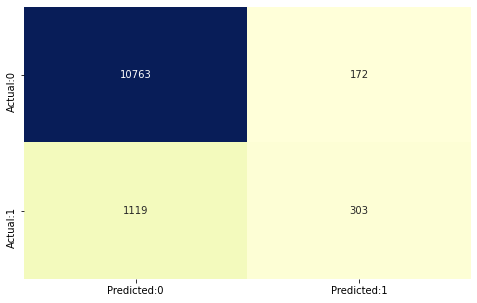

In [68]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_Poly)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [69]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1] 

In [70]:
# accuracy measures by classification_report()
result = classification_report(y_test, y_pred_Poly)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10935
           1       0.64      0.21      0.32      1422

    accuracy                           0.90     12357
   macro avg       0.77      0.60      0.63     12357
weighted avg       0.87      0.90      0.87     12357



In [71]:
# compute kappa value
kappa = metrics.cohen_kappa_score(y_test, y_pred_Poly)

# print kappa
print('kappa value:',kappa)

kappa value: 0.2778338883046966


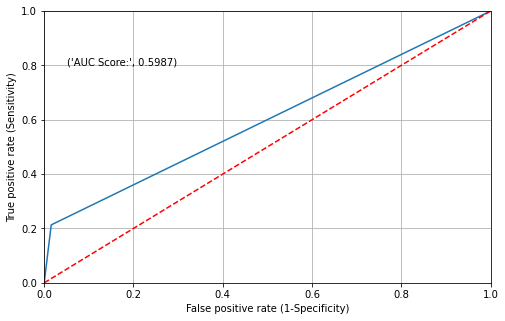

In [72]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_Poly)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_Poly),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [73]:
# The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)

# We see our classifier (SVM using polynomial sigmoid) is not very far away from the dotted line; which means the SVM using a polynomial classifier is not a very good classifier

In [74]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names


# compiling the required information
SVM_polynomial_metrics = pd.Series({'Model': "SVM using polynomial kernal ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_Poly),
                 'Precision Score': metrics.precision_score(y_test, y_pred_Poly),
                 'Recall Score': metrics.recall_score(y_test, y_pred_Poly),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_Poly),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_Poly),
                  'f1-score':metrics.f1_score(y_test, y_pred_Poly)})



# appending our result table
result_tabulation = result_tabulation.append(SVM_polynomial_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM using linear kernel,0.701452,0.484341,0.467651,0.881444,0.409036,0.475850
1,SVM using gaussian kernal,0.596000,0.635776,0.207454,0.895120,0.271586,0.312831
2,SVM using sigmoid kernal,0.593064,0.635556,0.201125,0.894796,0.264885,0.305556
3,SVM using polynomial kernal,0.598675,0.637895,0.213080,0.895525,0.277834,0.319452


In [75]:
# 4.5 Support Vector Machine using Polynomial Kernal with degree of polynomial = 2

# Now we build a SVM model using Polynomial kernal, with degree=2. We start with our original data set gradually proceeding with our analysis

# In order to buil a SVM model, we do the following:
# 1. Build the model
# 2. Predict the values
# 3. Compute the accuracy measures
# 4. Tabulate the results 

In [76]:
# build the model
svclassifier_Poly = SVC(kernel='poly', degree = 2, gamma = 'auto')
# fit the model
svclassifier_Poly.fit(X_train, y_train)

C:\Users\ABC\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(degree=2, gamma='auto', kernel='poly')

In [77]:
# predict the values
y_pred_Poly_d  = svclassifier_Poly.predict(X_test)

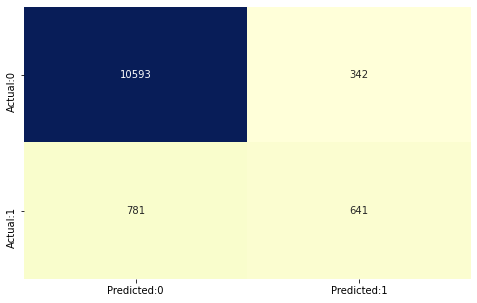

In [78]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_Poly_d)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [79]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1] 

In [80]:
# accuracy measures by classification_report()
result = classification_report(y_test, y_pred_Poly_d)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10935
           1       0.65      0.45      0.53      1422

    accuracy                           0.91     12357
   macro avg       0.79      0.71      0.74     12357
weighted avg       0.90      0.91      0.90     12357



In [81]:
# compute kappa value
kappa = metrics.cohen_kappa_score(y_test, y_pred_Poly_d)

# print kappa
print('kappa value:',kappa)

kappa value: 0.48456912179664824


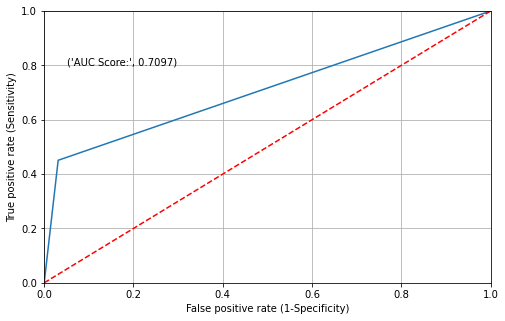

In [82]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_Poly_d)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_Poly_d),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [83]:
# The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)

# We see our classifier (SVM using polynomial with degree = 2) is away from the dotted line; which means the SVM using polynomial kernel with degree = 2 is a fairly good classifier 

In [84]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names


# compiling the required information
SVM_polynomial_d_metrics = pd.Series({'Model': "SVM using polynomial degree 2 kernal ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_Poly_d),
                 'Precision Score': metrics.precision_score(y_test, y_pred_Poly_d),
                 'Recall Score': metrics.recall_score(y_test, y_pred_Poly_d),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_Poly_d),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_Poly_d),
                  'f1-score':metrics.f1_score(y_test, y_pred_Poly_d)})



# appending our result table
result_tabulation = result_tabulation.append(SVM_polynomial_d_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM using linear kernel,0.701452,0.484341,0.467651,0.881444,0.409036,0.475850
1,SVM using gaussian kernal,0.596000,0.635776,0.207454,0.895120,0.271586,0.312831
2,SVM using sigmoid kernal,0.593064,0.635556,0.201125,0.894796,0.264885,0.305556
3,SVM using polynomial kernal,0.598675,0.637895,0.213080,0.895525,0.277834,0.319452
4,SVM using polynomial degree 2 kernal,0.709749,0.652085,0.450774,0.909120,0.484569,0.533056


In [85]:
# It can be seen from the result tabulation, that accuracy measures for the model with polynomial kernel, degree = 2 are better than other models. 

In [86]:
# 4.6 Support Vector Machine using Polynomial Kernal using GridSearchCV

# Now we build a SVM model using Polynomial kernal, with GridSearchCV. We start with our original data set gradually proceeding with our analysis

# In order to buil a SVM model, we do the following:
# 1. Build the model
# 2. Predict the values
# 3. Compute the accuracy measures
# 4. Tabulate the results 

In [87]:
# degree: Degree of the polynomial
# C: value of C parameter or regularisation parameter
# gamma:
param_grid = { 
    'degree': [2, 4], 
    'gamma' : ['auto','scale' ],
    'C': [0.5, 1]
}

In [ ]:
# param_grid: pass the list of parameters
# cv: determines the cross-validation splitting strategy
CV_rfc = GridSearchCV(estimator= svclassifier_Poly, param_grid=param_grid, scoring='accuracy', cv= 5)
# fit the model
CV_rfc.fit(X_train, y_train)

C:\Users\ABC\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [ ]:
# find the best parameters
# n_estimators: number of trees in the forest
# learning_rate: how each tree contributes to overall results
CV_rfc.best_params_

In [ ]:
# build the model with best parameters obtained from above code
svclassifier_Poly_Grid = SVC(kernel='poly', 
                            degree = 2, 
                            gamma = 'auto'
                           C = 1 )
# fit the model
svclassifier_Poly_Grid.fit(X_train, y_train)

In [ ]:
# predict the values
y_pred_Poly_Grid  = svclassifier_Poly_Grid.predict(X_test)

In [ ]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_Poly_Grid)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [ ]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1] 

In [ ]:
# accuracy measures by classification_report()
result = classification_report(y_test, y_pred_Poly_Grid)

# print the result
print(result)

In [ ]:
# compute kappa value
kappa = metrics.cohen_kappa_score(y_test, y_pred_Poly_Grid)

# print kappa
print('kappa value:',kappa)

In [ ]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_Poly_Grid)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_Poly_Grid),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [ ]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names


# compiling the required information
SVM_polynomial_grid_metrics = pd.Series({'Model': "SVM using polynomial kernal with GridSearch",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_Poly_d),
                 'Precision Score': metrics.precision_score(y_test, y_pred_Poly_d),
                 'Recall Score': metrics.recall_score(y_test, y_pred_Poly_d),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_Poly_d),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_Poly_d),
                  'f1-score':metrics.f1_score(y_test, y_pred_Poly_d)})



# appending our result table
result_tabulation = result_tabulation.append(SVM_polynomial_grid_metrics , ignore_index = True)

# view the result table
result_tabulation